In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

def plot_d(points, labels, title):   
    fig = plt.figure()
    if points.shape[1] > 2:    
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:    
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')    
        plt.title(title)
    plt.show()

In [2]:
x = np.load('processed_nav_data.npy')
y = np.load('nav_data_labels.npy')

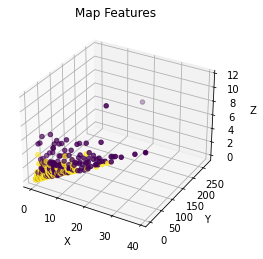

In [3]:
plot_d(x, y, 'Map Features')

# K-Means

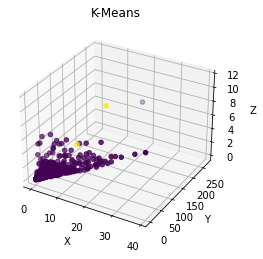

In [4]:
kmeans = KMeans(n_clusters=2).fit(x)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

plot_d(x, clustering_labels, 'K-Means')

# Dendogram
Sabe que rollo

----- Dendrogram plot -----


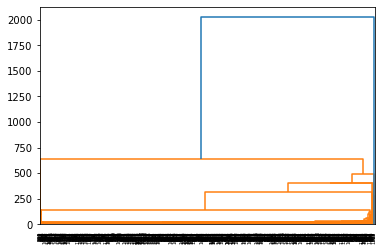

In [5]:
####### Dendrogram plot #######
print('----- Dendrogram plot -----')

linked = linkage(x, 'single')

plt.figure()
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.show()

----- Dendrogram plot -----


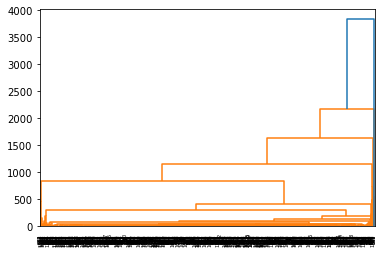

In [6]:
####### Dendrogram plot #######
print('----- Dendrogram plot -----')

linked = linkage(x, 'complete')

plt.figure()
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.show()

----- Dendrogram plot -----


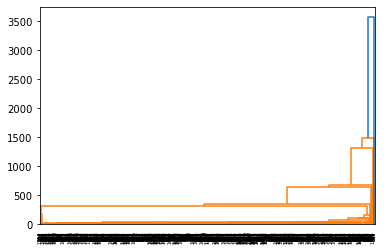

In [7]:
####### Dendrogram plot #######
print('----- Dendrogram plot -----')

linked = linkage(x, 'average')

plt.figure()
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.show()

# Aglomerative

----- Aglomerative clustering -----
Labels:  [0 0 0 ... 0 0 0]


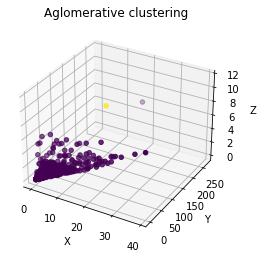

In [8]:
####### Aglomerative clustering #######
print('----- Aglomerative clustering -----')
agl = AgglomerativeClustering(n_clusters=2, linkage = 'complete').fit(x)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_d(x, clustering_labels, 'Aglomerative clustering')

Labels:  [0 0 0 ... 0 0 0]


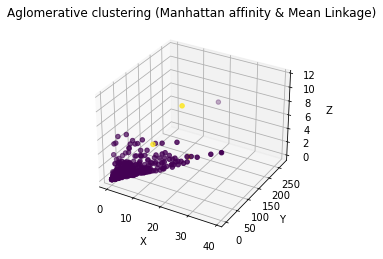

In [9]:
# Aglomerative clustering with manhattan distance and mean linkage
agl = AgglomerativeClustering(n_clusters=2, linkage = 'complete', affinity = 'manhattan').fit(x)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_d(x, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

----- Spectral clustering -----


/home/hivini/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Labels:  [0 0 0 ... 0 0 0]


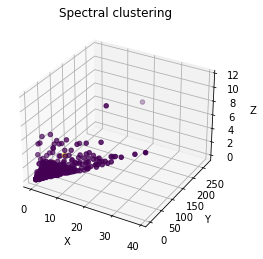

In [10]:
####### Spectral clustering #######
print('----- Spectral clustering -----')
spectral = SpectralClustering(n_clusters=2).fit(x)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_d(x, clustering_labels, 'Spectral clustering')

----- DBSCAN -----
Labels:  [ 0  0  0 ... -1  0  0]


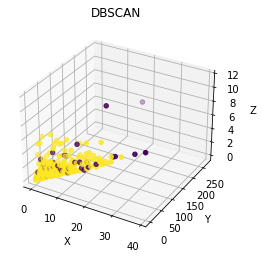

In [11]:
print('----- DBSCAN -----')
dbscan = DBSCAN(eps=20).fit(x)
clustering_labels = dbscan.labels_
print('Labels: ', clustering_labels)
plot_d(x, clustering_labels, 'DBSCAN')

/home/hivini/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Labels:  [0 0 0 ... 0 0 0]


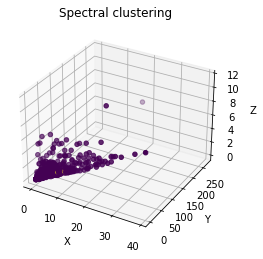

In [12]:
# Using custom affinity matrix
dist = pairwise_distances(x, metric = 'manhattan')
similarity = np.exp(- dist ** 2)

spectral = SpectralClustering(n_clusters=2, affinity = 'precomputed').fit(similarity)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_d(x, clustering_labels, 'Spectral clustering')

----- OPTICS -----
Labels:  [-1 -1 -1 ... -1 -1 -1]


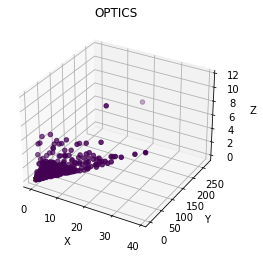

In [13]:
####### OPTICS #######
print('----- OPTICS -----')
optics = OPTICS(min_samples = 20).fit(x)
clustering_labels = optics.labels_
print('Labels: ', clustering_labels)
plot_d(x, clustering_labels, 'OPTICS')